In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph ,START , END

In [ ]:
class AgentState(TypedDict):
    number:int
    operation:str
    number2 : int
    final_number : int

In [3]:
def adder(state: AgentState)-> AgentState:
    """This node adds the 2 number"""
    state["final_number"] = state["number"] + state["number2"]
    return state

def sub(state: AgentState) -> AgentState:
    """This node subtracts the 2 number"""
    state["final_number"] = state["number"] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    if state["operation"] == "+":
        return "adding_node"
    else:
        return "subtracting_node"

In [11]:
graph = StateGraph(AgentState)

graph.add_node("adder_node", adder)
graph.add_node("sub_node" ,sub)
graph.add_node("router",lambda state:state)

graph.add_edge(START , "router")

graph.add_conditional_edges(
    
    "router",
    decide_next_node,
    {
        "adding_node" : "adder_node",
        "subtracting_node" : "sub_node"
    }

)
graph.add_edge("sub_node" , END)
graph.add_edge("adder_node" , END)

app = graph.compile()


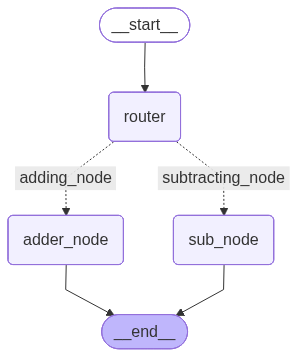

In [12]:
app.validate()

In [15]:
initial_state_1 = AgentState(number= 10 , number2= 30 , operation= "+")
print(app.invoke(initial_state_1))

{'number': 10, 'operation': '+', 'number2': 30, 'final_number': 40}
